In [1]:
import pandas as pd
from variables import *
import itertools
import dataframe_image as dfi
from statistics import mean
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


%load_ext rpy2.ipython

The table should contain the following:
- pop1
- pop2
- intersection mean fragment length
- intersection sequence length
- intersection number of fragments
- ind1
- ind2
- artificial genome 1 mean fragment length
- artificial genome 2 mean fragment length
- artificial genome 1 sequence length
- artificial genome 2 sequence length
- artificial genome 1 number of fragments
- artificial genome 2 number of fragments


In [56]:
pop1_list = []
pop2_list = []
nean_int_mean_frag_length = []
nean_int_total_seq_length = []
nean_int_number_of_frags = []
nean_ind1_list = []
nean_ind2_list = []
nean_art1_mean_frag_length = []
nean_art1_total_seq_length = []
nean_art1_number_of_frags = []
nean_art2_mean_frag_length = []
nean_art2_total_seq_length = []
nean_art2_number_of_frags = []
deni_int_mean_frag_length = []
deni_int_total_seq_length = []
deni_int_number_of_frags = []
deni_ind1_list = []
deni_ind2_list = []
deni_art1_mean_frag_length = []
deni_art1_total_seq_length = []
deni_art1_number_of_frags = []
deni_art2_mean_frag_length = []
deni_art2_total_seq_length = []
deni_art2_number_of_frags = []

for i in range(len(lpopulat)):
    for j in range(i, len(lpopulat)):
        pop1 = lpopulat[i]
        pop2 = lpopulat[j]
        pop1_list.append(pop1)
        pop2_list.append(pop2)
        nean_int_data = pd.read_csv("../script_results/Neanderthal/intersection/int_HGDP_{}_Neanderthal_HGDP_{}_Neanderthal_0.5.txt".format(pop1,pop2), sep='\t', header=None)
        nean_int_data.columns = ['chr', 'start', 'end', 'ind1', 'ind2']
        nean_int_mean_frag_length.append((nean_int_data['end']-nean_int_data['start']).mean())
        nean_int_total_seq_length.append((nean_int_data['end']-nean_int_data['start']+1).sum())
        nean_int_number_of_frags.append(len(nean_int_data))
        nean_art1_data = pd.read_csv("../script_results/Neanderthal/artificialgenomes/art_HGDP_{}_Neanderthal_0.5.txt".format(pop1), sep='\t', header=None)
        nean_art1_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
        nean_art2_data = pd.read_csv("../script_results/Neanderthal/artificialgenomes/art_HGDP_{}_Neanderthal_0.5.txt".format(pop2), sep='\t', header=None)
        nean_art2_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
        nean_ind1_list.append(nean_art1_data['ind'].nunique())
        nean_ind2_list.append(nean_art2_data['ind'].nunique())
        nean_art1_mean_frag_length.append((nean_art1_data['end']-nean_art1_data['start']).mean())
        nean_art2_mean_frag_length.append((nean_art2_data['end']-nean_art2_data['start']).mean())
        nean_art1_total_seq_length.append((nean_art1_data['end']-nean_art1_data['start']).sum())
        nean_art2_total_seq_length.append((nean_art2_data['end']-nean_art2_data['start']).sum())
        nean_art1_number_of_frags.append(len(nean_art1_data))
        nean_art2_number_of_frags.append(len(nean_art2_data))
        deni_int_data = pd.read_csv("../script_results/Denisova/intersection/int_HGDP_{}_Denisova_HGDP_{}_Denisova_0.5.txt".format(pop1,pop2), sep='\t', header=None)
        deni_int_data.columns = ['chr', 'start', 'end', 'ind1', 'ind2']
        deni_int_mean_frag_length.append((deni_int_data['end']-deni_int_data['start']).mean())
        deni_int_total_seq_length.append((deni_int_data['end']-deni_int_data['start']+1).sum())
        deni_int_number_of_frags.append(len(deni_int_data))
        deni_art1_data = pd.read_csv("../script_results/Denisova/artificialgenomes/art_HGDP_{}_Denisova_0.5.txt".format(pop1), sep='\t', header=None)
        deni_art1_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
        deni_art2_data = pd.read_csv("../script_results/Denisova/artificialgenomes/art_HGDP_{}_Denisova_0.5.txt".format(pop2), sep='\t', header=None)
        deni_art2_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
        deni_ind1_list.append(deni_art1_data['ind'].nunique())
        deni_ind2_list.append(deni_art2_data['ind'].nunique())
        deni_art1_mean_frag_length.append((deni_art1_data['end']-deni_art1_data['start']).mean())
        deni_art2_mean_frag_length.append((deni_art2_data['end']-deni_art2_data['start']).mean())
        deni_art1_total_seq_length.append((deni_art1_data['end']-deni_art1_data['start']).sum())
        deni_art2_total_seq_length.append((deni_art2_data['end']-deni_art2_data['start']).sum())
        deni_art1_number_of_frags.append(len(deni_art1_data))
        deni_art2_number_of_frags.append(len(deni_art2_data))
        
    

In [57]:
summary_table = pd.DataFrame({'pop1':pop1_list,'pop2':pop2_list,'nean_int_mean_frag_len':nean_int_mean_frag_length,'nean_int_total_seq_len':nean_int_total_seq_length,'nean_int_n_frags':nean_int_number_of_frags,'nean_n_ind1':nean_ind1_list,'nean_art1_mean_frag_len':nean_art1_mean_frag_length,'nean_art1_total_seq_len':nean_art1_total_seq_length,'nean_art1_n_frags':nean_art1_number_of_frags,'nean_n_ind2':nean_ind2_list,'nean_art2_mean_frag_len':nean_art2_mean_frag_length,'nean_art2_total_seq_len':nean_art2_total_seq_length,'nean_art2_n_frags':nean_art2_number_of_frags,'deni_int_mean_frag_len':deni_int_mean_frag_length,'deni_int_total_seq_len':deni_int_total_seq_length,'deni_int_n_frags':deni_int_number_of_frags,'deni_n_ind1':deni_ind1_list,'deni_art1_mean_frag_len':deni_art1_mean_frag_length,'deni_art1_total_seq_len':deni_art1_total_seq_length,'deni_art1_n_frags':deni_art1_number_of_frags,'deni_n_ind2':deni_ind2_list,'deni_art2_mean_frag_len':deni_art2_mean_frag_length,'deni_art2_total_seq_len':deni_art2_total_seq_length,'deni_art2_n_frags':deni_art2_number_of_frags})
summary_table

,pop1,pop2,nean_int_mean_frag_len,nean_int_total_seq_len,nean_int_n_frags,nean_n_ind1,nean_art1_mean_frag_len,nean_art1_total_seq_len,nean_art1_n_frags,nean_n_ind2,...,deni_int_total_seq_len,deni_int_n_frags,deni_n_ind1,deni_art1_mean_frag_len,deni_art1_total_seq_len,deni_art1_n_frags,deni_n_ind2,deni_art2_mean_frag_len,deni_art2_total_seq_len,deni_art2_n_frags
0,Burusho,Burusho,83004.237288,470141664,5664,24,83004.237288,470136000,5664,24,...,53873650,650,24,82881.538462,53873000,650,24,82881.538462,53873000,650
1,Burusho,Hazara,52720.891629,222328217,4217,24,83004.237288,470136000,5664,19,...,12028211,211,24,82881.538462,53873000,650,19,87803.212851,43726000,498
2,Burusho,Uygur,54133.176885,184543409,3409,24,83004.237288,470136000,5664,10,...,10204157,157,24,82881.538462,53873000,650,10,83228.395062,26966000,324
3,Burusho,Bougainville,52949.657869,108337046,2046,24,83004.237288,470136000,5664,11,...,8303166,166,24,82881.538462,53873000,650,11,111934.043425,273231000,2441
4,Burusho,PapuanHighlands,50631.277813,79644573,1573,24,83004.237288,470136000,5664,9,...,6742151,151,24,82881.538462,53873000,650,9,102869.120654,251515000,2445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,Pathan,Sindhi,54229.712859,260632806,4806,24,83494.323144,478005000,5725,24,...,18207333,333,24,78737.785016,48345000,614,24,80912.576687,52755000,652
1124,Pathan,Mozabite,53491.946309,159408980,2980,24,83494.323144,478005000,5725,27,...,4803094,94,24,78737.785016,48345000,614,26,74697.802198,13595000,182
1125,Sindhi,Sindhi,83600.000000,469837620,5620,24,83600.000000,469832000,5620,24,...,52755652,652,24,80912.576687,52755000,652,24,80912.576687,52755000,652
1126,Sindhi,Mozabite,54545.734841,159221919,2919,24,83600.000000,469832000,5620,27,...,5016092,92,24,80912.576687,52755000,652,26,74697.802198,13595000,182


In [58]:
div_neanderthal = pd.read_csv("../script_results/tables/div_Neanderthal_all.txt",sep='\t', header=None)
div_neanderthal.columns = ['pop1','pop2','mpd_neanderthal']
div_neanderthal = div_neanderthal.groupby(['pop1','pop2'])['mpd_neanderthal'].sum().reset_index()
div_neanderthal

,pop1,pop2,mpd_neanderthal
0,Adygei,Adygei,1164318.0
1,Adygei,Balochi,70815.0
2,Adygei,Basque,62807.0
3,Adygei,Bedouin,75803.5
4,Adygei,BergamoItalian,57944.0
...,...,...,...
2204,Yi,Tuscan,23168.0
2205,Yi,Uygur,50098.0
2206,Yi,Xibo,49453.5
2207,Yi,Yakut,56447.5


In [59]:
m = pd.merge(summary_table,div_neanderthal,on=['pop1','pop2'],how='inner')
m

,pop1,pop2,nean_int_mean_frag_len,nean_int_total_seq_len,nean_int_n_frags,nean_n_ind1,nean_art1_mean_frag_len,nean_art1_total_seq_len,nean_art1_n_frags,nean_n_ind2,...,deni_int_n_frags,deni_n_ind1,deni_art1_mean_frag_len,deni_art1_total_seq_len,deni_art1_n_frags,deni_n_ind2,deni_art2_mean_frag_len,deni_art2_total_seq_len,deni_art2_n_frags,mpd_neanderthal
0,Burusho,Burusho,83004.237288,470141664,5664,24,83004.237288,470136000,5664,24,...,650,24,82881.538462,53873000,650,24,82881.538462,53873000,650,1385034.5
1,Burusho,Hazara,52720.891629,222328217,4217,24,83004.237288,470136000,5664,19,...,211,24,82881.538462,53873000,650,19,87803.212851,43726000,498,80215.0
2,Burusho,Uygur,54133.176885,184543409,3409,24,83004.237288,470136000,5664,10,...,157,24,82881.538462,53873000,650,10,83228.395062,26966000,324,66912.0
3,Burusho,Bougainville,52949.657869,108337046,2046,24,83004.237288,470136000,5664,11,...,166,24,82881.538462,53873000,650,11,111934.043425,273231000,2441,41627.0
4,Burusho,PapuanHighlands,50631.277813,79644573,1573,24,83004.237288,470136000,5664,9,...,151,24,82881.538462,53873000,650,9,102869.120654,251515000,2445,33415.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,Pathan,Sindhi,54229.712859,260632806,4806,24,83494.323144,478005000,5725,24,...,333,24,78737.785016,48345000,614,24,80912.576687,52755000,652,91689.0
1124,Pathan,Mozabite,53491.946309,159408980,2980,24,83494.323144,478005000,5725,27,...,94,24,78737.785016,48345000,614,26,74697.802198,13595000,182,60677.0
1125,Sindhi,Sindhi,83600.000000,469837620,5620,24,83600.000000,469832000,5620,24,...,652,24,80912.576687,52755000,652,24,80912.576687,52755000,652,1337640.0
1126,Sindhi,Mozabite,54545.734841,159221919,2919,24,83600.000000,469832000,5620,27,...,92,24,80912.576687,52755000,652,26,74697.802198,13595000,182,59379.5


In [60]:
div_whole_genome = pd.read_csv("../script_results/tables/div_Human_all.txt",sep='\t',header=None)
div_whole_genome.columns = ['pop1','pop2','mpd_whole_genome']
div_whole_genome = div_whole_genome.groupby(['pop1','pop2'])['mpd_whole_genome'].sum().reset_index()
div_whole_genome

,pop1,pop2,mpd_whole_genome
0,Adygei,Adygei,1.533859e+06
1,Adygei,Balochi,1.627732e+06
2,Adygei,Basque,1.587798e+06
3,Adygei,Bedouin,1.655028e+06
4,Adygei,BergamoItalian,1.588550e+06
...,...,...,...
2204,Yi,Tuscan,1.698609e+06
2205,Yi,Uygur,1.586132e+06
2206,Yi,Xibo,1.495455e+06
2207,Yi,Yakut,1.524570e+06


In [61]:
merged = pd.merge(m,div_whole_genome,on=['pop1','pop2'],how='left')
merged

,pop1,pop2,nean_int_mean_frag_len,nean_int_total_seq_len,nean_int_n_frags,nean_n_ind1,nean_art1_mean_frag_len,nean_art1_total_seq_len,nean_art1_n_frags,nean_n_ind2,...,deni_n_ind1,deni_art1_mean_frag_len,deni_art1_total_seq_len,deni_art1_n_frags,deni_n_ind2,deni_art2_mean_frag_len,deni_art2_total_seq_len,deni_art2_n_frags,mpd_neanderthal,mpd_whole_genome
0,Burusho,Burusho,83004.237288,470141664,5664,24,83004.237288,470136000,5664,24,...,24,82881.538462,53873000,650,24,82881.538462,53873000,650,1385034.5,1.578349e+06
1,Burusho,Hazara,52720.891629,222328217,4217,24,83004.237288,470136000,5664,19,...,24,82881.538462,53873000,650,19,87803.212851,43726000,498,80215.0,1.635811e+06
2,Burusho,Uygur,54133.176885,184543409,3409,24,83004.237288,470136000,5664,10,...,24,82881.538462,53873000,650,10,83228.395062,26966000,324,66912.0,1.635316e+06
3,Burusho,Bougainville,52949.657869,108337046,2046,24,83004.237288,470136000,5664,11,...,24,82881.538462,53873000,650,11,111934.043425,273231000,2441,41627.0,1.707456e+06
4,Burusho,PapuanHighlands,50631.277813,79644573,1573,24,83004.237288,470136000,5664,9,...,24,82881.538462,53873000,650,9,102869.120654,251515000,2445,33415.5,1.718701e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,Pathan,Sindhi,54229.712859,260632806,4806,24,83494.323144,478005000,5725,24,...,24,78737.785016,48345000,614,24,80912.576687,52755000,652,91689.0,1.639102e+06
1124,Pathan,Mozabite,53491.946309,159408980,2980,24,83494.323144,478005000,5725,27,...,24,78737.785016,48345000,614,26,74697.802198,13595000,182,60677.0,1.758670e+06
1125,Sindhi,Sindhi,83600.000000,469837620,5620,24,83600.000000,469832000,5620,24,...,24,80912.576687,52755000,652,24,80912.576687,52755000,652,1337640.0,1.616363e+06
1126,Sindhi,Mozabite,54545.734841,159221919,2919,24,83600.000000,469832000,5620,27,...,24,80912.576687,52755000,652,26,74697.802198,13595000,182,59379.5,1.774242e+06


In [62]:
div_denisova = pd.read_csv("../script_results/tables/div_Denisova_all.txt",sep='\t',header=None)
div_denisova.columns = ['pop1','pop2','mpd_denisova']
div_denisova = div_denisova.groupby(['pop1','pop2'])['mpd_denisova'].sum().reset_index()
div_denisova

,pop1,pop2,mpd_denisova
0,Adygei,Adygei,66996.0
1,Adygei,Balochi,2646.5
2,Adygei,Basque,2358.5
3,Adygei,Bedouin,2385.0
4,Adygei,BergamoItalian,1935.0
...,...,...,...
2204,Yi,Tuscan,1211.0
2205,Yi,Uygur,3953.5
2206,Yi,Xibo,4522.0
2207,Yi,Yakut,4987.0


In [82]:
merged2 = pd.merge(merged,div_denisova,on=['pop1','pop2'],how='left')
merged2['div_neanderthal'] = merged2['mpd_neanderthal']/merged2['nean_int_total_seq_len']
merged2['div_whole_genome'] = merged2['mpd_whole_genome']/2252286208
merged2['div_denisova'] = merged2['mpd_denisova']/merged2['deni_int_total_seq_len']
merged2['norm_div_neanderthal'] = zscore(merged2['div_neanderthal'])
merged2['norm_div_whole_genome'] = zscore(merged2['div_whole_genome'])
merged2['norm_div_denisova'] = zscore(merged2['div_denisova'])


#merged2['norm_div_neanderthal'] = (merged2['div_neanderthal']-min(merged2['div_neanderthal']))/(max(merged2['div_neanderthal'])-min(merged2['div_neanderthal']))
#merged2['norm_div_whole_genome'] = (merged2['div_whole_genome']-min(merged2['div_whole_genome']))/(max(merged2['div_whole_genome'])-min(merged2['div_whole_genome']))
#merged2['norm_div_denisova'] = (merged2['div_denisova']-min(merged2['div_denisova']))/(max(merged2['div_denisova'])-min(merged2['div_denisova']))

merged2

,pop1,pop2,nean_int_mean_frag_len,nean_int_total_seq_len,nean_int_n_frags,nean_n_ind1,nean_art1_mean_frag_len,nean_art1_total_seq_len,nean_art1_n_frags,nean_n_ind2,...,deni_art2_n_frags,mpd_neanderthal,mpd_whole_genome,mpd_denisova,div_neanderthal,div_whole_genome,div_denisova,norm_div_neanderthal,norm_div_whole_genome,norm_div_denisova
0,Burusho,Burusho,83004.237288,470141664,5664,24,83004.237288,470136000,5664,24,...,650,1385034.5,1.578349e+06,104323.5,0.002946,0.000701,0.001936,4.201519,-0.486803,2.371463
1,Burusho,Hazara,52720.891629,222328217,4217,24,83004.237288,470136000,5664,19,...,498,80215.0,1.635811e+06,4727.0,0.000361,0.000726,0.000393,-0.240479,0.085276,-0.320890
2,Burusho,Uygur,54133.176885,184543409,3409,24,83004.237288,470136000,5664,10,...,324,66912.0,1.635316e+06,4115.0,0.000363,0.000726,0.000403,-0.237410,0.080351,-0.302968
3,Burusho,Bougainville,52949.657869,108337046,2046,24,83004.237288,470136000,5664,11,...,2441,41627.0,1.707456e+06,4005.0,0.000384,0.000758,0.000482,-0.200202,0.798563,-0.165025
4,Burusho,PapuanHighlands,50631.277813,79644573,1573,24,83004.237288,470136000,5664,9,...,2445,33415.5,1.718701e+06,2869.5,0.000420,0.000763,0.000426,-0.139511,0.910513,-0.264000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,Pathan,Sindhi,54229.712859,260632806,4806,24,83494.323144,478005000,5725,24,...,652,91689.0,1.639102e+06,7212.5,0.000352,0.000728,0.000396,-0.255946,0.118042,-0.315414
1124,Pathan,Mozabite,53491.946309,159408980,2980,24,83494.323144,478005000,5725,27,...,182,60677.0,1.758670e+06,2455.5,0.000381,0.000781,0.000511,-0.206386,1.308434,-0.114635
1125,Sindhi,Sindhi,83600.000000,469837620,5620,24,83600.000000,469832000,5620,24,...,652,1337640.0,1.616363e+06,86761.0,0.002847,0.000718,0.001645,4.031468,-0.108340,1.862342
1126,Sindhi,Mozabite,54545.734841,159221919,2919,24,83600.000000,469832000,5620,27,...,182,59379.5,1.774242e+06,2373.0,0.000373,0.000788,0.000473,-0.219619,1.463469,-0.181193


In [83]:
flipped = merged2.copy()
flipped = flipped.rename(columns={'pop1'                    :'pop2',
                                  'pop2'                    :'pop1',
                                  "nean_n_ind1"             : "nean_n_ind2",
                                  "nean_art1_mean_frag_len" : "nean_art2_mean_frag_len",
                                  "nean_art1_total_seq_len" : "nean_art2_total_seq_len",
                                  "nean_art1_n_frags"       : "nean_art2_n_frags",
                                  "nean_n_ind2"             : "nean_n_ind1",
                                  "nean_art2_mean_frag_len" : "nean_art1_mean_frag_len",
                                  "nean_art2_total_seq_len" : "nean_art1_total_seq_len",
                                  "nean_art2_n_frags"       : "nean_art1_n_frags",
                                  "deni_n_ind1"             : "deni_n_ind2",
                                  "deni_art1_mean_frag_len" : "deni_art2_mean_frag_len",
                                  "deni_art1_total_seq_len" : "deni_art2_total_seq_len",
                                  "deni_art1_n_frags"       : "deni_art2_n_frags",
                                  "deni_n_ind2"             : "deni_n_ind1",
                                  "deni_art2_mean_frag_len" : "deni_art1_mean_frag_len",
                                  "deni_art2_total_seq_len" : "deni_art1_total_seq_len",
                                  "deni_art2_n_frags"       : "deni_art1_n_frags"})



flipped['norm_div_neanderthal'] = flipped['norm_div_denisova']
flipped['norm_div_denisova'] = flipped['norm_div_whole_genome']

flipped

,pop2,pop1,nean_int_mean_frag_len,nean_int_total_seq_len,nean_int_n_frags,nean_n_ind2,nean_art2_mean_frag_len,nean_art2_total_seq_len,nean_art2_n_frags,nean_n_ind1,...,deni_art1_n_frags,mpd_neanderthal,mpd_whole_genome,mpd_denisova,div_neanderthal,div_whole_genome,div_denisova,norm_div_neanderthal,norm_div_whole_genome,norm_div_denisova
0,Burusho,Burusho,83004.237288,470141664,5664,24,83004.237288,470136000,5664,24,...,650,1385034.5,1.578349e+06,104323.5,0.002946,0.000701,0.001936,2.371463,-0.486803,-0.486803
1,Burusho,Hazara,52720.891629,222328217,4217,24,83004.237288,470136000,5664,19,...,498,80215.0,1.635811e+06,4727.0,0.000361,0.000726,0.000393,-0.320890,0.085276,0.085276
2,Burusho,Uygur,54133.176885,184543409,3409,24,83004.237288,470136000,5664,10,...,324,66912.0,1.635316e+06,4115.0,0.000363,0.000726,0.000403,-0.302968,0.080351,0.080351
3,Burusho,Bougainville,52949.657869,108337046,2046,24,83004.237288,470136000,5664,11,...,2441,41627.0,1.707456e+06,4005.0,0.000384,0.000758,0.000482,-0.165025,0.798563,0.798563
4,Burusho,PapuanHighlands,50631.277813,79644573,1573,24,83004.237288,470136000,5664,9,...,2445,33415.5,1.718701e+06,2869.5,0.000420,0.000763,0.000426,-0.264000,0.910513,0.910513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,Pathan,Sindhi,54229.712859,260632806,4806,24,83494.323144,478005000,5725,24,...,652,91689.0,1.639102e+06,7212.5,0.000352,0.000728,0.000396,-0.315414,0.118042,0.118042
1124,Pathan,Mozabite,53491.946309,159408980,2980,24,83494.323144,478005000,5725,27,...,182,60677.0,1.758670e+06,2455.5,0.000381,0.000781,0.000511,-0.114635,1.308434,1.308434
1125,Sindhi,Sindhi,83600.000000,469837620,5620,24,83600.000000,469832000,5620,24,...,652,1337640.0,1.616363e+06,86761.0,0.002847,0.000718,0.001645,1.862342,-0.108340,-0.108340
1126,Sindhi,Mozabite,54545.734841,159221919,2919,24,83600.000000,469832000,5620,27,...,182,59379.5,1.774242e+06,2373.0,0.000373,0.000788,0.000473,-0.181193,1.463469,1.463469


In [84]:
sum_table = pd.concat([merged2,flipped])
sum_table.loc[sum_table["pop1"] == sum_table["pop2"], "norm_div_neanderthal"] = 0
sum_table.loc[sum_table["pop1"] == sum_table["pop2"], "norm_div_denisova"] = 0
sum_table.loc[sum_table["pop1"] == sum_table["pop2"], "norm_div_whole_genome"] = 0
sum_table = sum_table.drop_duplicates().reset_index(drop=True)
sum_table

,pop1,pop2,nean_int_mean_frag_len,nean_int_total_seq_len,nean_int_n_frags,nean_n_ind1,nean_art1_mean_frag_len,nean_art1_total_seq_len,nean_art1_n_frags,nean_n_ind2,...,deni_art2_n_frags,mpd_neanderthal,mpd_whole_genome,mpd_denisova,div_neanderthal,div_whole_genome,div_denisova,norm_div_neanderthal,norm_div_whole_genome,norm_div_denisova
0,Burusho,Burusho,83004.237288,470141664,5664,24,83004.237288,470136000,5664,24,...,650,1385034.5,1.578349e+06,104323.5,0.002946,0.000701,0.001936,0.000000,0.000000,0.000000
1,Burusho,Hazara,52720.891629,222328217,4217,24,83004.237288,470136000,5664,19,...,498,80215.0,1.635811e+06,4727.0,0.000361,0.000726,0.000393,-0.240479,0.085276,-0.320890
2,Burusho,Uygur,54133.176885,184543409,3409,24,83004.237288,470136000,5664,10,...,324,66912.0,1.635316e+06,4115.0,0.000363,0.000726,0.000403,-0.237410,0.080351,-0.302968
3,Burusho,Bougainville,52949.657869,108337046,2046,24,83004.237288,470136000,5664,11,...,2441,41627.0,1.707456e+06,4005.0,0.000384,0.000758,0.000482,-0.200202,0.798563,-0.165025
4,Burusho,PapuanHighlands,50631.277813,79644573,1573,24,83004.237288,470136000,5664,9,...,2445,33415.5,1.718701e+06,2869.5,0.000420,0.000763,0.000426,-0.139511,0.910513,-0.264000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,Sindhi,Kalash,53834.001145,188099494,3494,24,83600.000000,469832000,5620,22,...,340,68360.0,1.635683e+06,5002.5,0.000363,0.000726,0.000441,-0.236990,0.084000,0.084000
2205,Mozabite,Kalash,54861.086766,125195282,2282,27,86723.330442,299976000,3459,22,...,340,49733.0,1.755552e+06,2350.0,0.000397,0.000779,0.000569,-0.013874,1.277395,1.277395
2206,Sindhi,Pathan,54229.712859,260632806,4806,24,83600.000000,469832000,5620,24,...,614,91689.0,1.639102e+06,7212.5,0.000352,0.000728,0.000396,-0.315414,0.118042,0.118042
2207,Mozabite,Pathan,53491.946309,159408980,2980,27,86723.330442,299976000,3459,24,...,614,60677.0,1.758670e+06,2455.5,0.000381,0.000781,0.000511,-0.114635,1.308434,1.308434


In [85]:
metadata = pd.read_table("~/GenerationInterval/people/moi/files/metadata.txt")
metadata = metadata[metadata['dat'] == 'HGDP']

reg_dict = metadata[['pop','reg']].drop_duplicates().rename(columns={'pop':'pop1','reg':'reg1'})
sum_table = pd.merge(sum_table,reg_dict,on=['pop1'])
reg_dict = metadata[['pop','reg']].drop_duplicates().rename(columns={'pop':'pop2','reg':'reg2'})
sum_table = pd.merge(sum_table,reg_dict,on=['pop2'])
sum_table = sum_table.drop_duplicates().reset_index(drop=True)


In [86]:
sum_table['nean_ratio1'] = sum_table['nean_int_total_seq_len']/sum_table['nean_art1_total_seq_len']
sum_table['nean_ratio2'] = sum_table['nean_int_total_seq_len']/sum_table['nean_art2_total_seq_len']
sum_table['deni_ratio1'] = sum_table['deni_int_total_seq_len']/sum_table['deni_art1_total_seq_len']
sum_table['deni_ratio2'] = sum_table['deni_int_total_seq_len']/sum_table['deni_art2_total_seq_len']
#sum_table['div_neanderthal'] = sum_table['mpd_neanderthal']/sum_table['nean_int_total_seq_len']
#sum_table['div_whole_genome'] = sum_table['mpd_whole_genome']/2252286208
#sum_table['div_denisova'] = sum_table['mpd_denisova']/sum_table['deni_int_total_seq_len']


sum_table = sum_table.drop_duplicates().reset_index(drop=True)
sum_table

,pop1,pop2,nean_int_mean_frag_len,nean_int_total_seq_len,nean_int_n_frags,nean_n_ind1,nean_art1_mean_frag_len,nean_art1_total_seq_len,nean_art1_n_frags,nean_n_ind2,...,div_denisova,norm_div_neanderthal,norm_div_whole_genome,norm_div_denisova,reg1,reg2,nean_ratio1,nean_ratio2,deni_ratio1,deni_ratio2
0,Burusho,Burusho,83004.237288,470141664,5664,24,83004.237288,470136000,5664,24,...,0.001936,0.000000,0.000000,0.000000,SAS,SAS,1.000012,1.000012,1.000012,1.000012
1,Hazara,Burusho,52720.891629,222328217,4217,19,84074.290159,432310000,5142,24,...,0.000393,-0.320890,0.085276,0.085276,SAS,SAS,0.514280,0.472902,0.275081,0.223270
2,Uygur,Burusho,54133.176885,184543409,3409,10,88113.441132,348753000,3958,24,...,0.000403,-0.302968,0.080351,0.080351,SAS,SAS,0.529152,0.392532,0.378408,0.189411
3,Bougainville,Burusho,52949.657869,108337046,2046,11,100468.928708,263530000,2623,24,...,0.000482,-0.165025,0.798563,0.798563,OCE,SAS,0.411099,0.230438,0.030389,0.154125
4,PapuanHighlands,Burusho,50631.277813,79644573,1573,9,96848.018648,207739000,2145,24,...,0.000426,-0.264000,0.910513,0.910513,OCE,SAS,0.383388,0.169408,0.026806,0.125149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,Makrani,Mozabite,53635.001702,157528937,2937,25,82959.946081,430811000,5193,27,...,0.000443,-0.196846,1.448638,-0.234248,SAS,MID,0.365657,0.525138,0.120873,0.347707
2205,Kalash,Mozabite,54861.086766,125195282,2282,22,85339.244410,332055000,3891,27,...,0.000569,-0.177852,1.277395,-0.013874,SAS,MID,0.377032,0.417351,0.139266,0.303794
2206,Pathan,Mozabite,53491.946309,159408980,2980,24,83494.323144,478005000,5725,27,...,0.000511,-0.206386,1.308434,-0.114635,SAS,MID,0.333488,0.531406,0.099350,0.353299
2207,Sindhi,Mozabite,54545.734841,159221919,2919,24,83600.000000,469832000,5620,27,...,0.000473,-0.219619,1.463469,-0.181193,SAS,MID,0.338891,0.530782,0.095083,0.368966


In [87]:
sum_table.to_csv("../script_results/tables/All_summary_table.txt",sep='\t',header=True, index=False)


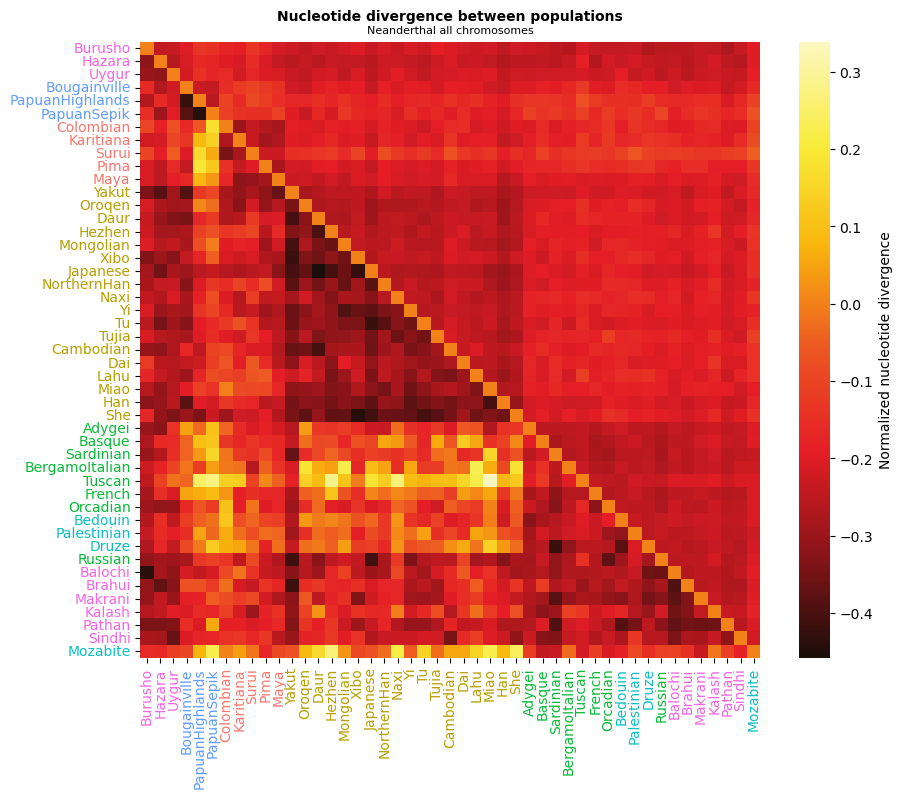

In [88]:
df = pd.read_csv("../script_results/tables/All_summary_table.txt", header = 0, sep = '\t')
#df.loc[df["pop1"] == df['pop2'], "norm_div_neanderthal"] = 0

result = df.pivot(index='pop1',columns='pop2',values='norm_div_neanderthal')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = result[column_order][row_order]
table4 = table3.reindex(row_order)

fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4,linewidth = 0, xticklabels=True,yticklabels=True, cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Normalized nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Neanderthal all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
#plt.savefig('../script_results/plots/div_Neanderthal_all_heatmap.png')

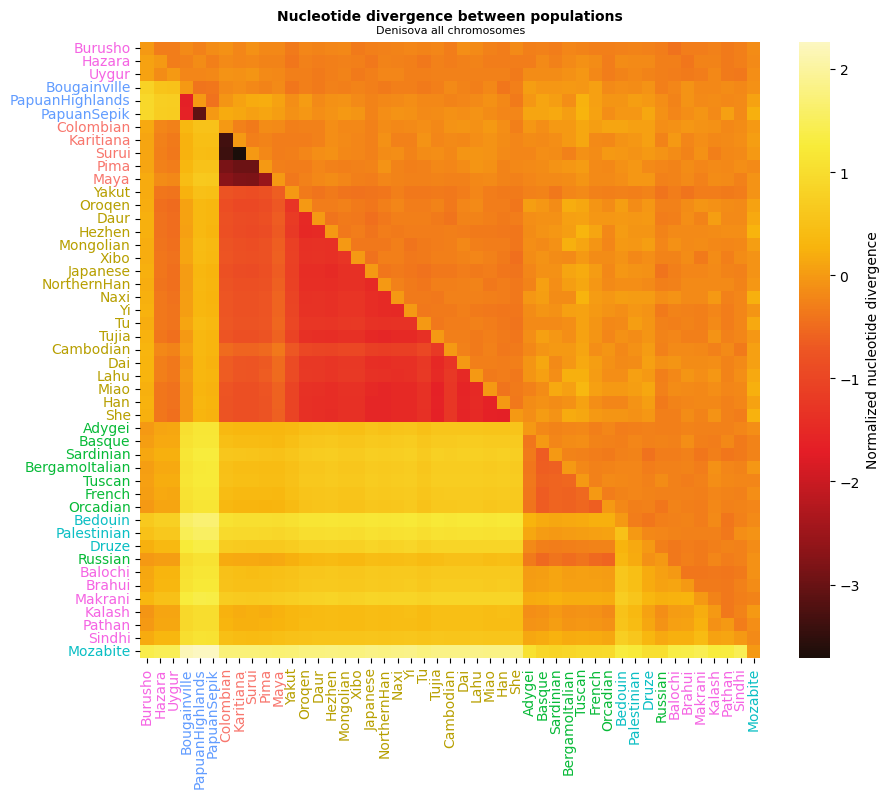

In [89]:
df = pd.read_csv("../script_results/tables/All_summary_table.txt", header = 0, sep = '\t')
#rslt_df = df[df['div_denisova'] <6e-05]
#df.loc[df["pop1"] == df['pop2'], "norm_div_denisova"] = 0

result = df.pivot(index='pop1',columns='pop2',values='norm_div_denisova')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = result[column_order][row_order]
table4 = table3.reindex(row_order)

fig, axs = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4,linewidth = 0, xticklabels=True,yticklabels=True, cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Normalized nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Denisova all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.savefig('../script_results/plots/div_Denisova_all_heatmap.png')

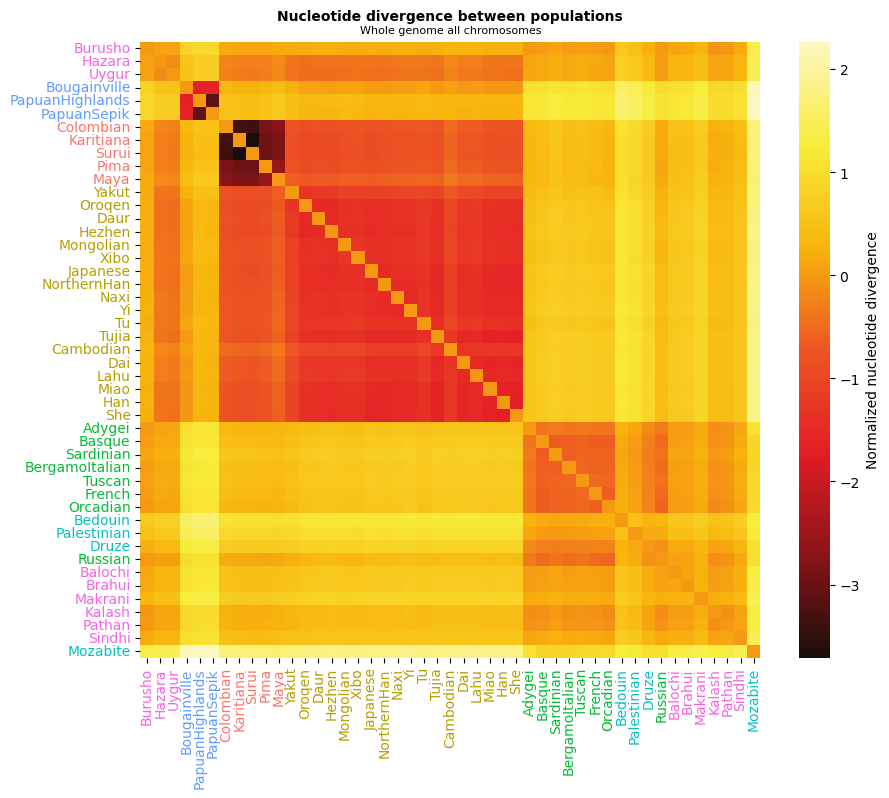

In [91]:
df = pd.read_csv("../script_results/tables/All_summary_table.txt", header = 0, sep = '\t')
#df.loc[df["pop1"] == df['pop2'], "div_whole_genome"] = 0

result = df.pivot(index='pop1',columns='pop2',values='norm_div_whole_genome')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = result[column_order][row_order]
table4 = table3.reindex(row_order)

fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4,linewidth = 0, xticklabels=True,yticklabels=True, cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Normalized nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Whole genome all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.savefig('../script_results/plots/div_whole_genome_all_heatmap.png')

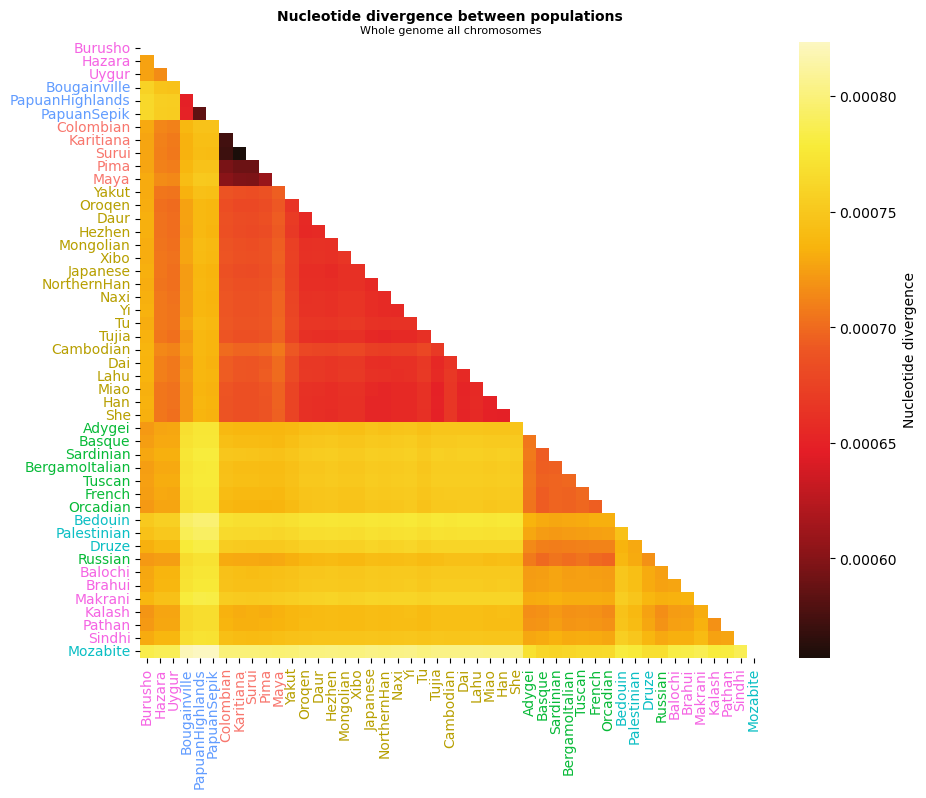

In [92]:

df = div_whole_genome
#df.loc[df["pop1"] == df['pop2'], "mpd"] = 0
df['div_whole_genome'] = df['mpd_whole_genome'] / 2252286208
corr= df.pivot(index='pop1',columns='pop2',values='div_whole_genome')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = corr[column_order][row_order]
table4 = table3.reindex(row_order)
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(table4)
#matrix[np.diag_indices_from(matrix)] = False

# using the upper triangle matrix as mask 
fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4, annot=False, mask=matrix,xticklabels=True,yticklabels=True,cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Whole genome all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    


In [93]:
div_whole_genome = pd.read_csv("../script_results/tables/div_Human_all.txt",sep='\t',header=None)
div_whole_genome.columns = ['pop1','pop2','mpd_whole_genome']
div_whole_genome = div_whole_genome.groupby(['pop1','pop2'])['mpd_whole_genome'].sum().reset_index()


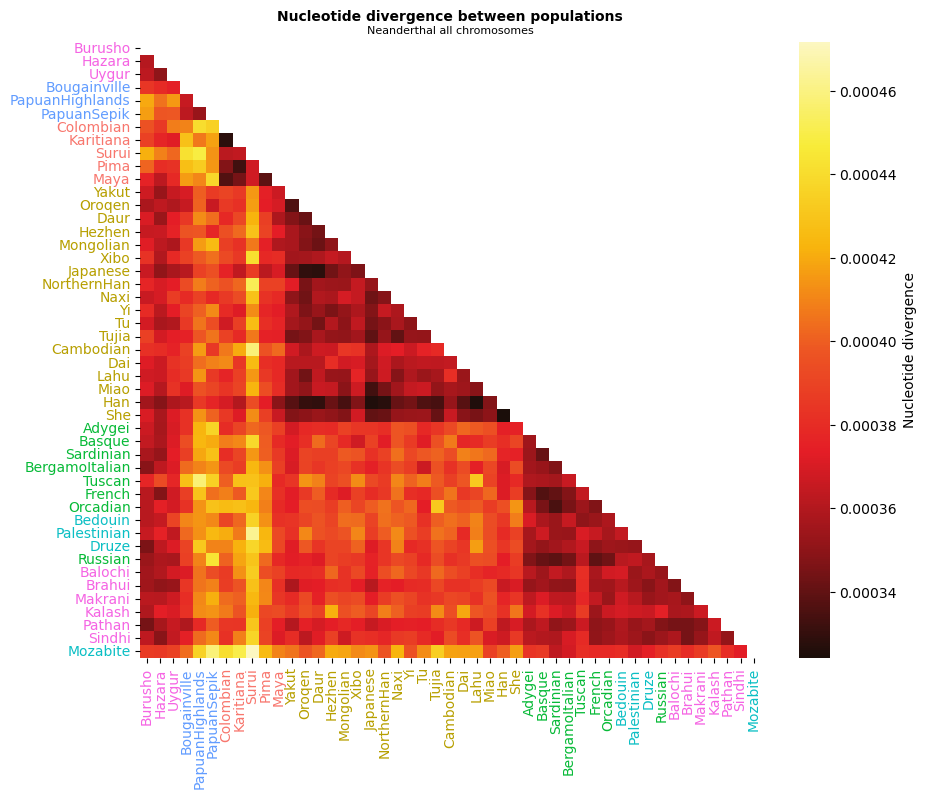

In [94]:
df = pd.read_csv("../script_results/tables/All_summary_table.txt", header = 0, sep = '\t')
#df['div_neanderthal'] = df['mpd_neanderthal'] / df['nean_int_total_seq_len']

corr= df.pivot(index='pop1',columns='pop2',values='div_neanderthal')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = corr[column_order][row_order]
table4 = table3.reindex(row_order)
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(table4)
#matrix[np.diag_indices_from(matrix)] = False

# using the upper triangle matrix as mask 
fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4, annot=False, mask=matrix,xticklabels=True,yticklabels=True,cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Neanderthal all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    


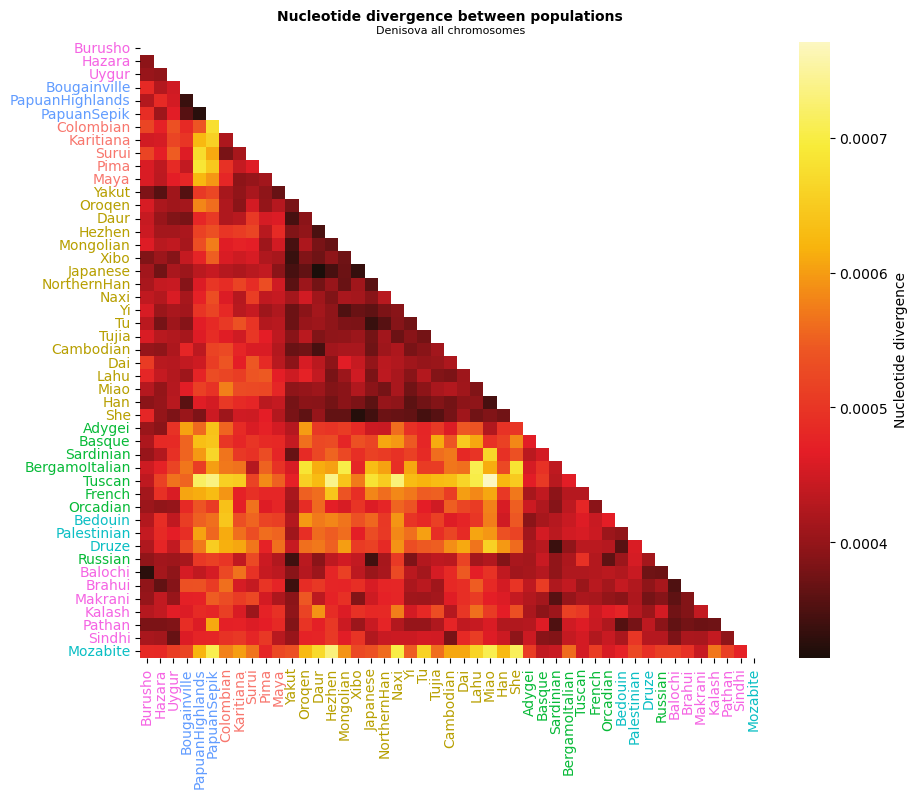

In [95]:
df = pd.read_csv("../script_results/tables/All_summary_table.txt", header = 0, sep = '\t')

corr= df.pivot(index='pop1',columns='pop2',values='div_denisova')
column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = corr[column_order][row_order]
table4 = table3.reindex(row_order)
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(table4)
#matrix[np.diag_indices_from(matrix)] = False

# using the upper triangle matrix as mask 
fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4, annot=False, mask=matrix,xticklabels=True,yticklabels=True,cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True),cbar_kws={'label': 'Nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Denisova all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)
my_colors = ['#f564e3','#f564e3','#f564e3','#619cff','#619cff','#619cff','#f8766d','#f8766d','#f8766d','#f8766d','#f8766d','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#b79f00','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#07ba37','#0bbfc4','#0bbfc4','#0bbfc4','#07ba37','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#f564e3','#0bbfc4']
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    
